In [32]:
import matplotlib.pyplot as plt
from ase.optimize.sciopt import *               
from ase.utils.geometry import *
from ase.lattice.spacegroup import crystal
from ase.visualize import *
from ase.lattice.surface import surface
from ase import Atoms
from ase import io
from ase.io.cif import read_cif
from ase.io.cif import write_cif
from ase.io.vasp import write_vasp
from abtem.visualize import show_atoms
from ase.visualize.plot import plot_atoms
from ase.build import add_adsorbate
import random

# FASnI3 structures and following figures are taken from: http://dx.doi.org/10.1021/acsenergylett.0c01166

### below missing FA are placed

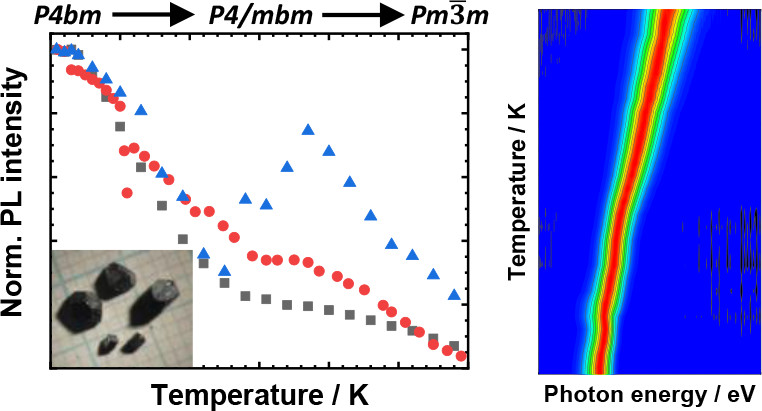

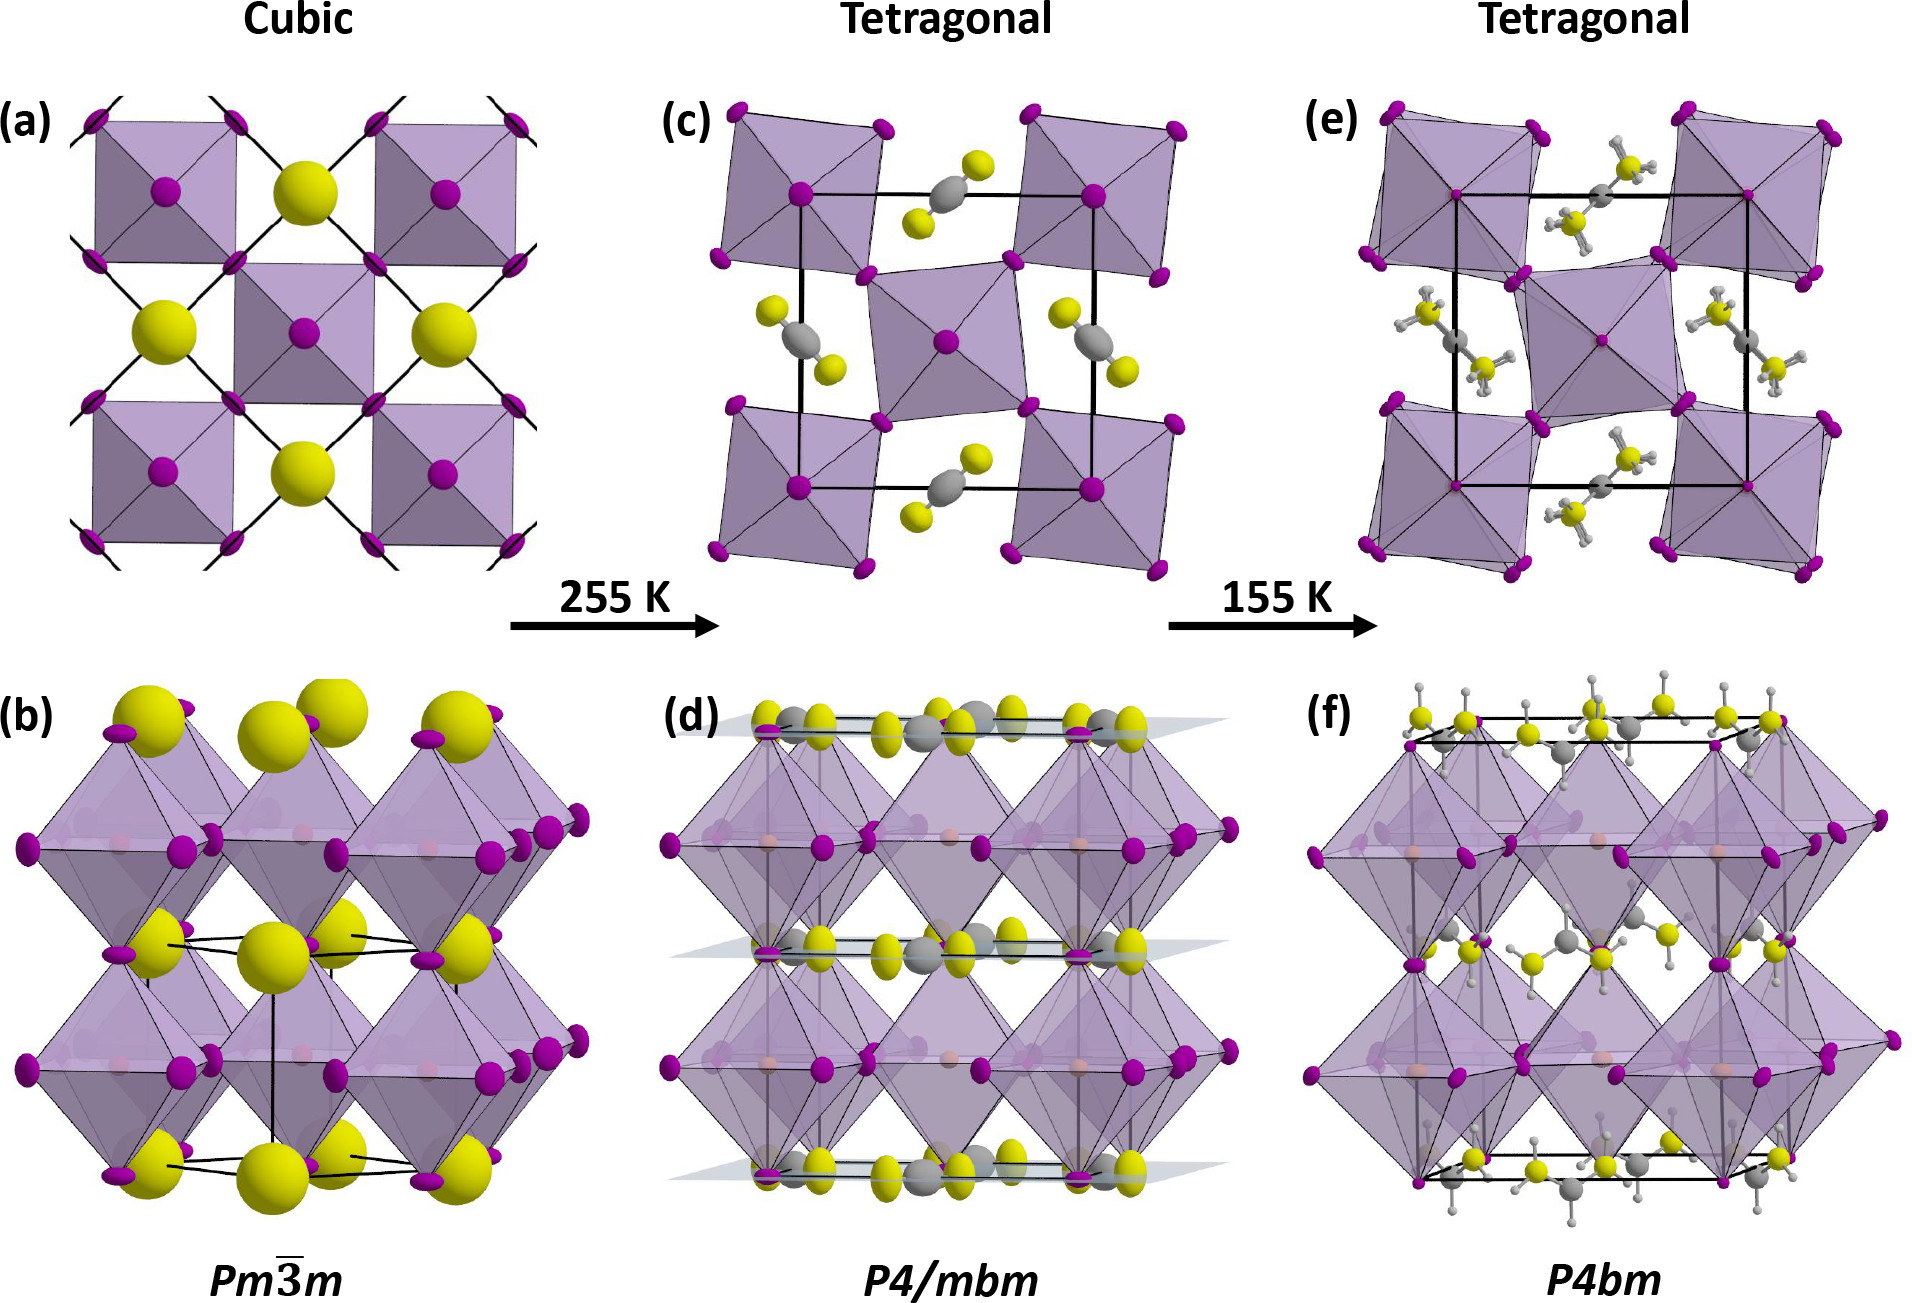

## cubic pm3m polymorph: https://dx.doi.org/10.25505/fiz.icsd.cc2c6f67
- Experimental data
  - Space Group: P m 3 m (221)
  - Cell: a 6.3074(15)Å b 6.3074(15)Å c 6.3074(15)Å, α 90° β 90° γ 90° 


In [5]:
structure = io.read('pm3m.cif')
structure = sort(structure)
view(structure)
structure

/home/ahlawat/.local/lib/python3.9/site-packages/ase/io/cif.py:401: UserWarning: crystal system 'cubic' is not interpreted for space group Spacegroup(221, setting=1). This may result in wrong setting!
  warnings.warn(


Atoms(symbols='I3MnSn', pbc=True, cell=[6.3074, 6.3074, 6.3074], spacegroup_kinds=...)

30


/home/ahlawat/.local/lib/python3.9/site-packages/ase/io/cif.py:787: UserWarning: Occupancies present but no occupancy info for "{symbol}"
  warnings.warn(str(err))


Text(0, 0.5, 'y[$\\AA$]')

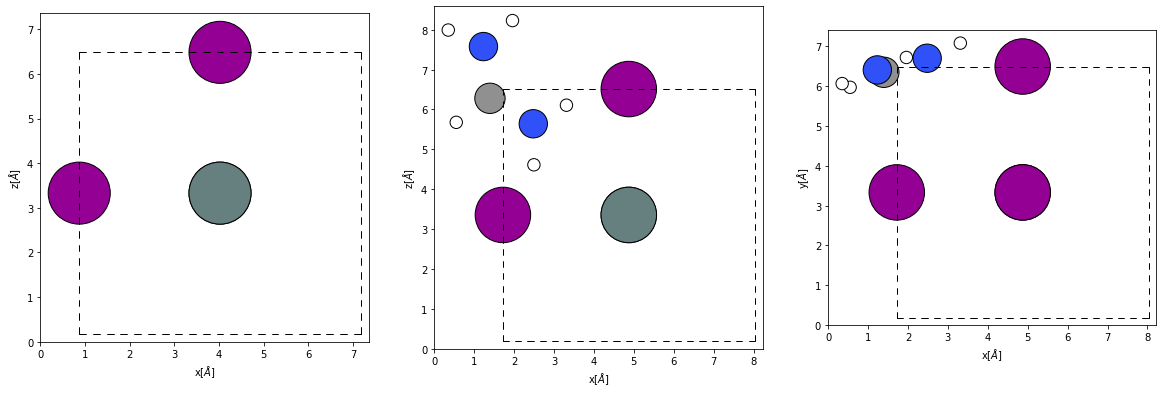

In [33]:
structure = io.read('pm3m.cif')
structure = sort(structure)
tmp_molecule=[]
j = 0
num_atoms = len(structure.get_chemical_symbols())
i = 0
Mn_index = []
flag = False


while i < num_atoms:
    if(structure.get_chemical_symbols()[i] == 'Mn'):
        Mn_index.append(i)
        molecule = io.read('FA.pdb')
        angle = random.randint(0,180)
        print(angle)
        molecule.rotate(angle, 'z')
        molecule.set_cell(structure.cell)
        xmin = molecule.get_center_of_mass()[0]
        xmax = structure.positions[i, 0]
        ymin = molecule.get_center_of_mass()[1]
        ymax = structure.positions[i, 1]
        zmin = molecule.get_center_of_mass()[2]
        zmax = structure.positions[i, 2]
        molecule.positions += (xmax - xmin, ymax - ymin, zmax - zmin)   
        if j==0:
            tmp_molecule = molecule 
        else:
            tmp_molecule += molecule
        j = j+1
    i = i + 1

del structure[Mn_index]  
FA_replaced_structure = structure + tmp_molecule
FA_replaced_structure = sort(FA_replaced_structure)

view (FA_replaced_structure)

write_cif('pm3m_updated.cif',FA_replaced_structure, cif_format=None, wrap=True, labels=None, loop_keys=None)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

plot_atoms(structure, ax1, radii=0.5, rotation=('90x,0y,0z'))
#ax1.set_xlim(-20, 30)
ax1.set_xlabel(r'x[$\AA$]')
ax1.set_ylabel(r'z[$\AA$]')

plot_atoms(FA_replaced_structure, ax2, radii=0.5, rotation=('90x,0y,0z'))
#ax2.set_xlim(-20, 30)
ax2.set_xlabel(r'x[$\AA$]')
ax2.set_ylabel(r'z[$\AA$]')

plot_atoms(FA_replaced_structure, ax3, radii=0.5, rotation=('180x,0y,0z'))
#ax3.set_xlim(-20, 30)
ax3.set_xlabel(r'x[$\AA$]')
ax3.set_ylabel(r'y[$\AA$]')

#fig.savefig("ase_slab.png")

#view(structure)


### prepare vasp/quantum espresso input file

In [ ]:
write_vasp('cubic.vasp', FA_replaced_structure, vasp5=True, direct=True)

# inp_data={'prefix':"cubic",
#           'electron_maxstep':1000,
#           'outdir':"./",    
#           'pseudo_dir':"/work/e89/e89/ahlawat/PP/",
#           'calculation':'vc-relax',
#           'vdw_corr':'grimme-d3',
#           'ecutwfc':80.,
#           'occupations':'fixed',
#           'ecutrho':560.,   
#           'conv_thr':1e-8,
#           'electron_maxstep':500,
#           'ion_dynamics':'bfgs',
#           'cell_dynamics':'bfgs'}

# pseudos={"C":"C.pbe-n-rrkjus_psl.1.0.0.UPF", 
#          "H":"H.pbe-rrkjus_psl.1.0.0.UPF", 
#          "I":"I.pbe-n-rrkjus_psl.0.2.UPF", 
#          "N":"N.pbe-n-rrkjus_psl.1.0.0.UPF",
#          "Pb":"Pb.pbe-dn-rrkjus_psl.0.2.2.UPF"}

# io.write("Sn_cubic.pwi", 
#          new_slab, 
#          input_data=inp_data,
#          pseudopotentials=pseudos, 
#          kpts=(1, 2, 3),
#          koffset=(0, 0, 0), 
#          crystal_coordinates=False)


## tetragonal P4/mbm polymorph: https://dx.doi.org/10.5517/ccdc.csd.cc258rmv
- Experimental data
   - Space group 	P 4/m b m (127)
   - Unit cell 	a 8.8821(6)Å b 8.8821(6)Å c 6.2698(6)Å α 90° β 90° γ 90°
   - Cell volume 	494.64
   - Reduced cell 	a 6.270Å b 8.882Å c 8.882Å α 90.000° β 90.000° γ 90.000°
   - Temperature (K) 	200

In [9]:
structure = io.read('P4mbm.cif')
structure = sort(structure)
view(structure)
structure

/home/ahlawat/.local/lib/python3.9/site-packages/ase/io/cif.py:401: UserWarning: crystal system 'tetragonal' is not interpreted for space group Spacegroup(127, setting=1). This may result in wrong setting!
  warnings.warn(


Atoms(symbols='C2I6N4Sn2', pbc=True, cell=[8.8821, 8.8821, 6.2698], spacegroup_kinds=...)

/home/ahlawat/.local/lib/python3.9/site-packages/ase/io/cif.py:401: UserWarning: crystal system 'tetragonal' is not interpreted for space group Spacegroup(127, setting=1). This may result in wrong setting!
  warnings.warn(


9
52


Text(0, 0.5, 'y[$\\AA$]')

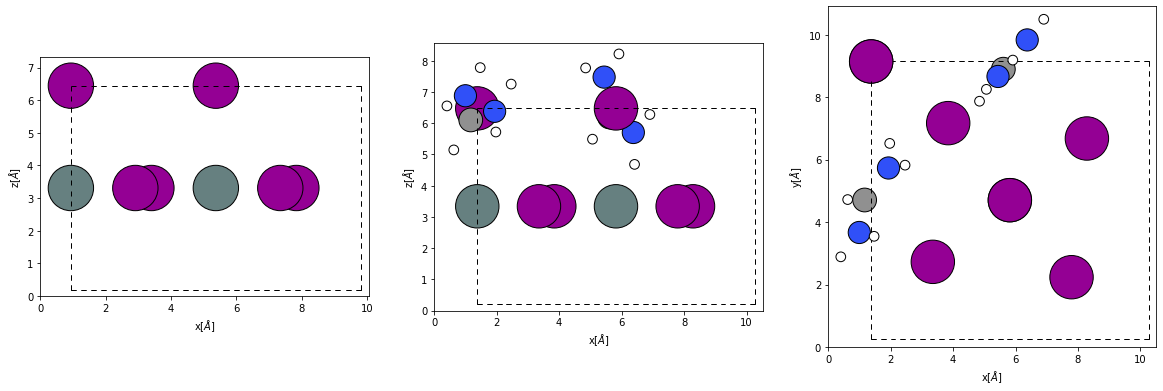

In [34]:
structure = io.read('P4mbm.cif')
structure = sort(structure)
tmp_molecule=[]
j = 0
num_atoms = len(structure.get_chemical_symbols())
i = 0
del_index = []
flag = False
while i < num_atoms:
    if(structure.get_chemical_symbols()[i] == 'N'):
        del_index.append(i)
    if(structure.get_chemical_symbols()[i] == 'C'):
        del_index.append(i)
        molecule = io.read('FA.pdb')
        angle = random.randint(0,180)
        print(angle)
        molecule.rotate(angle, 'x')
        molecule.set_cell(structure.cell)
        xmin = molecule.get_center_of_mass()[0]
        xmax = structure.positions[i, 0]
        ymin = molecule.get_center_of_mass()[1]
        ymax = structure.positions[i, 1]
        zmin = molecule.get_center_of_mass()[2]
        zmax = structure.positions[i, 2]
        molecule.positions += (xmax - xmin, ymax - ymin, zmax - zmin)   
        if j==0:
            tmp_molecule = molecule 
        else:
            tmp_molecule += molecule
        j = j+1
    i = i + 1

del structure[del_index]  
FA_replaced_structure = structure + tmp_molecule
FA_replaced_structure = sort(FA_replaced_structure)

view (FA_replaced_structure)
write_cif('p4mbm_updated.cif',FA_replaced_structure, cif_format=None, wrap=True, labels=None, loop_keys=None)


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

plot_atoms(structure, ax1, radii=0.5, rotation=('90x,0y,0z'))
#ax1.set_xlim(-20, 30)
ax1.set_xlabel(r'x[$\AA$]')
ax1.set_ylabel(r'z[$\AA$]')

plot_atoms(FA_replaced_structure, ax2, radii=0.5, rotation=('90x,0y,0z'))
#ax2.set_xlim(-20, 30)
ax2.set_xlabel(r'x[$\AA$]')
ax2.set_ylabel(r'z[$\AA$]')

plot_atoms(FA_replaced_structure, ax3, radii=0.5, rotation=('180x,0y,0z'))
#ax3.set_xlim(-20, 30)
ax3.set_xlabel(r'x[$\AA$]')
ax3.set_ylabel(r'y[$\AA$]')

#fig.savefig("ase_slab.png")

#view(structure)



### prepare vasp input file

In [ ]:
write_vasp('tetragonal.vasp', FA_replaced_structure, vasp5=True, direct=True)

## orthorhombic P4bm polymorph: https://dx.doi.org/10.5517/ccdc.csd.cc258rnw

- Experimental data
  - Space group 	P 4 b m (100)
  - Unit cell 	a 8.8379(11)Å b 8.8379(11)Å c 12.4066(17)Å α 90° β 90° γ 90°
  - Cell volume 	969.06
  - Reduced cell 	a 8.838Å b 8.838Å c 12.407Å α 90.000° β 90.000° γ 90.000°
  - Temperature (K) 	100

In [12]:
structure = io.read('P4bm.cif')
structure = sort(structure)
view(structure)
structure

/home/ahlawat/.local/lib/python3.9/site-packages/ase/io/cif.py:401: UserWarning: crystal system 'tetragonal' is not interpreted for space group Spacegroup(100, setting=1). This may result in wrong setting!
  warnings.warn(


Atoms(symbols='C4H20I12N8Sn4', pbc=True, cell=[8.8379, 8.8379, 12.4066], spacegroup_kinds=...)

/home/ahlawat/.local/lib/python3.9/site-packages/ase/io/cif.py:401: UserWarning: crystal system 'tetragonal' is not interpreted for space group Spacegroup(100, setting=1). This may result in wrong setting!
  warnings.warn(


57
103
25
166


Text(0, 0.5, 'y[$\\AA$]')

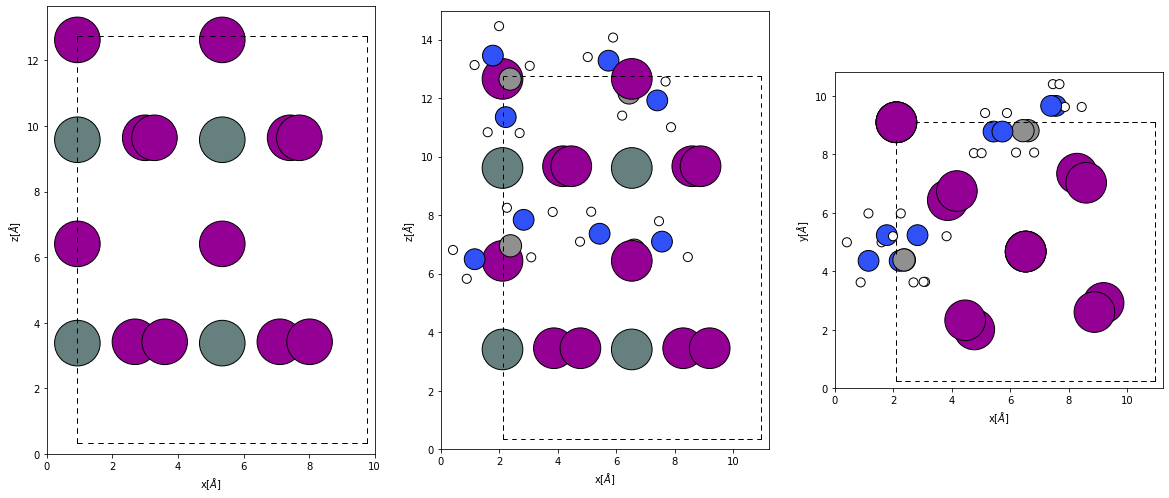

In [35]:
structure = io.read('P4bm.cif')
structure = sort(structure)
tmp_molecule=[]
j = 0
num_atoms = len(structure.get_chemical_symbols())
i = 0
del_index = []
flag = False
while i < num_atoms:
    if(structure.get_chemical_symbols()[i] == 'N'):
        del_index.append(i)
    if(structure.get_chemical_symbols()[i] == 'H'):
        del_index.append(i)
    if(structure.get_chemical_symbols()[i] == 'C'):
        del_index.append(i)
        molecule = io.read('FA.pdb')
        angle = random.randint(0,180)
        print(angle)
        molecule.rotate(angle, 'y')
        molecule.set_cell(structure.cell)
        xmin = molecule.get_center_of_mass()[0]
        xmax = structure.positions[i, 0]
        ymin = molecule.get_center_of_mass()[1]
        ymax = structure.positions[i, 1]
        zmin = molecule.get_center_of_mass()[2]
        zmax = structure.positions[i, 2]
        molecule.positions += (xmax - xmin, ymax - ymin, zmax - zmin)   
        if j==0:
            tmp_molecule = molecule 
        else:
            tmp_molecule += molecule
        j = j+1
    i = i + 1

del structure[del_index]  
FA_replaced_structure = structure + tmp_molecule
FA_replaced_structure = sort(FA_replaced_structure)

view (FA_replaced_structure)
write_cif('p4bm_updated.cif',FA_replaced_structure, cif_format=None, wrap=True, labels=None, loop_keys=None)


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

plot_atoms(structure, ax1, radii=0.5, rotation=('90x,0y,0z'))
#ax1.set_xlim(-20, 30)
ax1.set_xlabel(r'x[$\AA$]')
ax1.set_ylabel(r'z[$\AA$]')

plot_atoms(FA_replaced_structure, ax2, radii=0.5, rotation=('90x,0y,0z'))
#ax2.set_xlim(-20, 30)
ax2.set_xlabel(r'x[$\AA$]')
ax2.set_ylabel(r'z[$\AA$]')

plot_atoms(FA_replaced_structure, ax3, radii=0.5, rotation=('180x,0y,0z'))
#ax3.set_xlim(-20, 30)
ax3.set_xlabel(r'x[$\AA$]')
ax3.set_ylabel(r'y[$\AA$]')

#fig.savefig("ase_slab.png")

#view(structure)

### prepare vasp input file

In [ ]:
write_vasp('ortho.vasp', FA_replaced_structure, vasp5=True, direct=True)

## Hexagonal polymorph of Sn not FASnI3: https://dx.doi.org/10.5517/ccdc.csd.cc1ncdw9

- Experimental data
  - Formula 	(I27 Sn9 9-)n,9n(C3 H10 N +)
  - Space group 	R 3 c (161)
  - Unit cell 	a 16.0400(4)Å b 16.0400(4)Å c 72.226(3)Å
  - α 90.00° β 90.00° γ 120.00°
  - Cell volume 	16092.85
  - Reduced cell 	a 16.040Å b 16.040Å c 25.795Å
  - α 71.886° β 71.886° γ 60.000°
  - Colour 	pale yellow

In [29]:
structure = io.read('Ethylammonium_Tin_Iodide_hexa.cif')
structure = sort(structure)
view(structure)

/home/ahlawat/.local/lib/python3.9/site-packages/ase/io/cif.py:401: UserWarning: crystal system 'Orthorhombic' is not interpreted for space group Spacegroup(33, setting=1). This may result in wrong setting!
  warnings.warn(


<Popen: returncode: None args: ['/home/ahlawat/miniconda3/bin/python', '-m',...>

In [ ]:
structure

40
100
113
28


Text(0, 0.5, 'y[$\\AA$]')

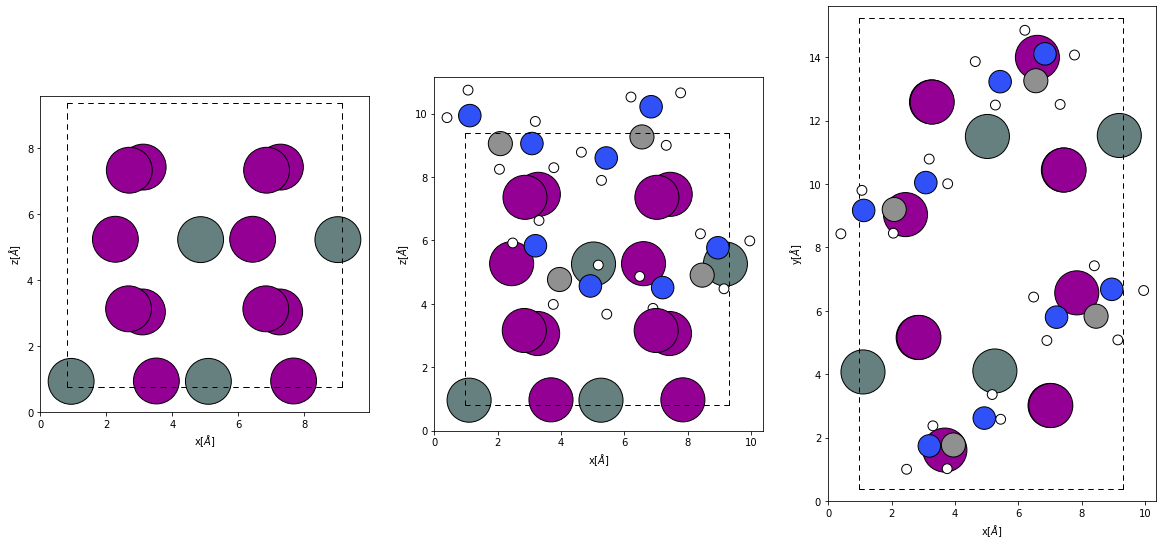

In [37]:
structure = io.read('Ethylammonium_Tin_Iodide_hexa.cif')
structure = sort(structure)
tmp_molecule=[]
j = 0
num_atoms = len(structure.get_chemical_symbols())
i = 0
del_index = []
flag = False

while i < num_atoms:
    if(structure.get_chemical_symbols()[i] == 'C'):
        del_index.append(i)
    if(structure.get_chemical_symbols()[i] == 'H'):
        del_index.append(i)
    if(structure.get_chemical_symbols()[i] == 'N'):
        del_index.append(i)
        molecule = io.read('FA.pdb')
        angle = random.randint(0,180)
        print(angle)
        molecule.rotate(angle, 'y')
        molecule.set_cell(structure.cell)
        xmin = molecule.get_center_of_mass()[0]
        xmax = structure.positions[i, 0]
        ymin = molecule.get_center_of_mass()[1]
        ymax = structure.positions[i, 1]
        zmin = molecule.get_center_of_mass()[2]
        zmax = structure.positions[i, 2]
        molecule.positions += (xmax - xmin, ymax - ymin, zmax - zmin)   
        if j==0:
            tmp_molecule = molecule 
        else:
            tmp_molecule += molecule
        j = j+1
    i = i + 1

del structure[del_index]  
FA_replaced_structure = structure + tmp_molecule
FA_replaced_structure = sort(FA_replaced_structure)

view (FA_replaced_structure)

write_cif('hexa_FASnI3_updated.cif',FA_replaced_structure, cif_format=None, wrap=True, labels=None, loop_keys=None)


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

plot_atoms(structure, ax1, radii=0.5, rotation=('90x,0y,0z'))
#ax1.set_xlim(-20, 30)
ax1.set_xlabel(r'x[$\AA$]')
ax1.set_ylabel(r'z[$\AA$]')

plot_atoms(FA_replaced_structure, ax2, radii=0.5, rotation=('90x,0y,0z'))
#ax2.set_xlim(-20, 30)
ax2.set_xlabel(r'x[$\AA$]')
ax2.set_ylabel(r'z[$\AA$]')

plot_atoms(FA_replaced_structure, ax3, radii=0.5, rotation=('180x,0y,0z'))
#ax3.set_xlim(-20, 30)
ax3.set_xlabel(r'x[$\AA$]')
ax3.set_ylabel(r'y[$\AA$]')

#fig.savefig("ase_slab.png")

#view(structure)


In [ ]:
write_vasp('hexagonal.vasp', FA_replaced_structure, vasp5=True, direct=True)

# inp_data={'prefix':"cubic",
#           'electron_maxstep':1000,
#           'outdir':"./",    
#           'pseudo_dir':"/work/e89/e89/ahlawat/PP/",
#           'calculation':'vc-relax',
#           'vdw_corr':'grimme-d3',
#           'ecutwfc':80.,
#           'occupations':'fixed',
#           'ecutrho':560.,   
#           'conv_thr':1e-8,
#           'electron_maxstep':500,
#           'ion_dynamics':'bfgs',
#           'cell_dynamics':'bfgs'}

# pseudos={"C":"C.pbe-n-rrkjus_psl.1.0.0.UPF", 
#          "H":"H.pbe-rrkjus_psl.1.0.0.UPF", 
#          "I":"I.pbe-n-rrkjus_psl.0.2.UPF", 
#          "N":"N.pbe-n-rrkjus_psl.1.0.0.UPF",
#          "Pb":"Pb.pbe-dn-rrkjus_psl.0.2.2.UPF"}

# io.write("Sn_cubic.pwi", 
#          new_slab, 
#          input_data=inp_data,
#          pseudopotentials=pseudos, 
#          kpts=(1, 2, 3),
#          koffset=(0, 0, 0), 
#          crystal_coordinates=False)

In [ ]:
! pip install --user spglib

In [ ]:
import spglib 

In [ ]:
lattice, scaled_positions, numbers = spglib.find_primitive(FA_replaced_structure, symprec=1e-5, angle_tolerance=-1.0)

In [ ]:
view(scaled_positions)

In [ ]:
scaled_positions